In [1]:
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

def MRF(I,J,eta=2.0,zeta=1.5):
    ind =np.arange(np.shape(I)[0])
    np.random.shuffle(ind)
    orderx = ind.copy()
    np.random.shuffle(ind)

    for i in orderx:
        for j in ind:
            oldJ = J[i,j]
            J[i,j]=1
            patch = 0
            for k in range(-1,1):
                for l in range(-1,1):
                    patch += J[i,j] * J[i+k,j+l]
            energya = -eta*np.sum(I*J) - zeta*patch
            J[i,j]=-1
            patch = 0
            for k in range(-1,1):
                for l in range(-1,1):
                    patch += J[i,j] * J[i+k,j+l]
            energyb = -eta*np.sum(I*J) - zeta*patch
            if energya<energyb:
                J[i,j] = 1
            else:
                J[i,j] = -1
    return J

#### Original image:

Text(0.5, 1.0, 'Original Image')

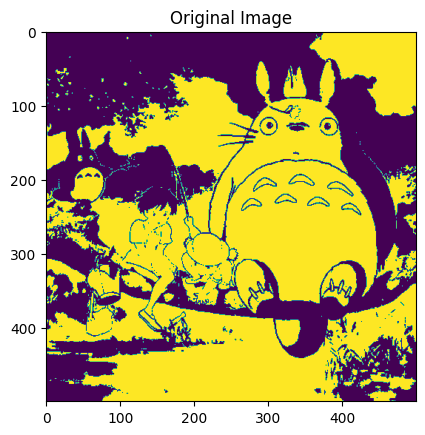

In [2]:
I = pl.imread("imgs/totoro.jpg")
N = np.shape(I)[0]
I = I[:,:,0]
I = np.where(I<120,-1,1)
original = I
pl.imshow(I)
pl.title('Original Image')

#### Generating noisy image:

Text(0.5, 1.0, 'Noisy image')

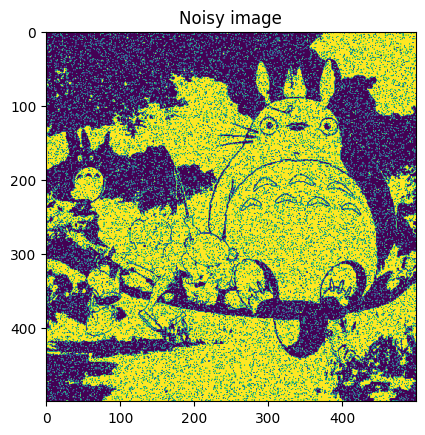

In [3]:
noise = np.random.rand(N,N)
J = I.copy()
ind = np.where(noise<0.1)
J[ind] = -J[ind]
noisy = J
pl.figure()
pl.imshow(J)
pl.title('Noisy image')

#### Denoising noisy image:

6906 -340


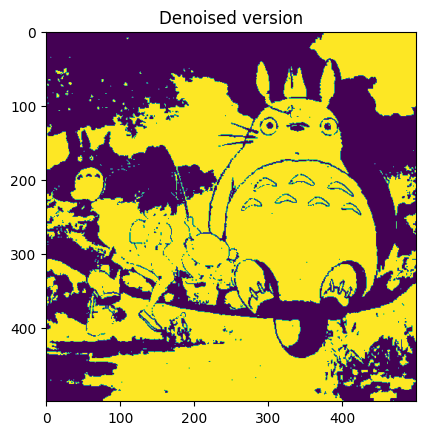

In [4]:
newJ = J.copy()
newJ = MRF(I,newJ)
denoised = newJ
pl.figure()
pl.imshow(newJ)
pl.title('Denoised version')
print (np.sum(I-J), np.sum(I-newJ))
pl.show()

#### Comparison of original, noisy and denoised image:

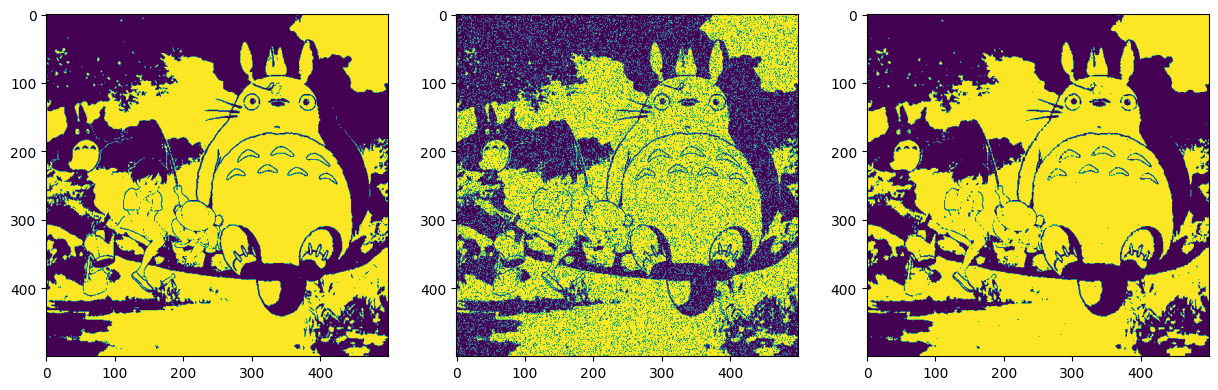

In [5]:
plt.figure(figsize=(15,10))
plt.subplot(1, 3, 1)
plt.imshow(original)
plt.subplot(1, 3, 2)
plt.imshow(noisy)
plt.subplot(1, 3, 3)
plt.imshow(denoised)